In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobsuite_results = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/02072023_EcoliARETE_Plasmids_Isolates_All_mobsuite_results.csv")

In [3]:
mobsuite_results

,Plasmid_Pathname,sample_id,num_contigs,size,gc,md5,rep_type(s),rep_type_accession(s),relaxase_type(s),relaxase_type_accession(s),...,mash_neighbor_identification,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s)
0,EC_0012_1H1_D,AA176,1,122464,49.792592,bae7b31a92e73259a9fdce9386cf720c,"IncFIB,rep_cluster_2244","000095__NZ_CP014273_00094,CP033091_00053",MOBF,NC_017627_00068,...,Escherichia coli DSM 30083 = JCM 1649 = ATCC 1...,AA176,AH856,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
1,EC_0012_1H1_D,AC509,1,13263,48.639071,5b4f3ad6edcedb6905d7b1baef091751,rep_cluster_2350,CP035723_00002,"MOBP,MOBP,MOBP","NC_019076_00002,CP043517_00004,NC_017321_00002",...,Escherichia coli,AC509,AL724,multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",multi-phylla,"Firmicutes,Bacteroidetes,Actinobacteria,Proteo...",genus,Escherichia,6263753; 17122402; 26802429
2,EC_0012_2H1_D,AB685,1,1211,49.215524,2bcc79518c21b23b52395ee8712e6edb,-,-,-,-,...,Escherichia coli,AB685,AK563,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
3,EC_0012_2H1_D,AB690,3,4643,44.238639,46ccbe4c1582e15f8afc796ccd8c43ef,Col(MG828),NC_008486,-,-,...,Escherichia coli APEC IMT5155,AB690,-,order,Enterobacterales,order,Enterobacterales,genus,Escherichia,30761100
4,EC_0012_2H1_D,AA176,1,123147,49.863984,27f1d8272639c9be851e99ee64d724c6,"IncFIB,rep_cluster_2244","000095__NZ_CP014273_00094,CP033091_00053",MOBF,NC_017627_00068,...,Escherichia coli DSM 30083 = JCM 1649 = ATCC 1...,AA176,AH856,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,EC_E9DN_2_E,AB062,1,8707,48.926151,c38e9205c569df0cb66f36a69d907b98,rep_cluster_2350,CP035723_00002,MOBP,NC_019076_00002,...,Salmonella enterica subsp. enterica,AB062,AJ622,multi-phylla,"Proteobacteria,Firmicutes,Bacteroidetes,Actino...",multi-phylla,"Proteobacteria,Firmicutes,Bacteroidetes,Actino...",genus,Escherichia,6263753; 17122402; 26802429
877,EC_E9DN_2_E,AA669,1,3263,47.011952,fff2423b4ed8ea9fb5b62da26c07d8dc,rep_cluster_2350,CP041342_00001,MOBF,CP019897,...,Escherichia coli,AA669,AI944,multi-phylla,"Proteobacteria,Firmicutes,Bacteroidetes,Actino...",multi-phylla,"Proteobacteria,Firmicutes,Bacteroidetes,Actino...",genus,Escherichia,6263753; 17122402; 26802429
878,EC_E9L_1_E,AA668,1,3609,43.252979,caad5945d0e39e2568fab324132b4544,rep_cluster_2350,CP041342_00001,MOBF,CP019897,...,Salmonella enterica subsp. enterica serovar En...,AA668,AI943,multi-phylla,"Actinobacteria,Proteobacteria,Firmicutes,Bacte...",multi-phylla,"Actinobacteria,Proteobacteria,Firmicutes,Bacte...",genus,Escherichia,6263753; 17122402; 26802429
879,EC_E9L_1_E,AA159,1,3692,51.408451,b1e87fa9c119a279a0d319adb593ad4b,-,-,"MOBP,MOBP","NC_019076_00002,NC_016903_00002",...,Escherichia coli,AA159,-,genus,Escherichia,genus,Escherichia,-,-,-


In [4]:
mobsuite_nonovel = mobsuite_results[mobsuite_results["sample_id"].str.contains("novel")==False]

In [44]:
mobsuitecrosstab = pd.crosstab(mobsuite_nonovel.sample_id, mobsuite_nonovel.Plasmid_Pathname)

In [45]:
mobsuitecrosstab

Plasmid_Pathname,EC_0012_1H1_D,EC_0012_2H1_D,EC_0012_2L1_D,EC_0012_3S1_D,EC_0012_C1_H,EC_0012_C3_H,EC_0012_C5_H,EC_0012_C7_H,EC_0038_1H1_D,EC_0038_1S2_D,...,EC_E8BF_2_E,EC_E8FP_1_E,EC_E8FP_2_E,EC_E8L_1_E,EC_E9BE_1_E,EC_E9DI_1_E,EC_E9DI_2_E,EC_E9DN_1_E,EC_E9DN_2_E,EC_E9L_1_E
sample_id,,,,,,,,,,,,,,,,,,,,,
AA144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
AA151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mPA= mobsuitecrosstab.sum(axis = 1)

In [7]:
PA2 = pd.DataFrame(data=mPA)
PA3 = PA2.reset_index()
PA3.columns = ['Plasmid_Cluster', 'Total']

In [51]:
PA3.sort_values("Total")

,Plasmid_Cluster,Total
48,AA903,1
41,AA673,1
42,AA674,1
46,AA749,1
47,AA860,1
...,...,...
77,AC748,30
23,AA329,43
27,AA378,49
10,AA176,64


In [56]:
PA3.Total.lt(2).sum()

32

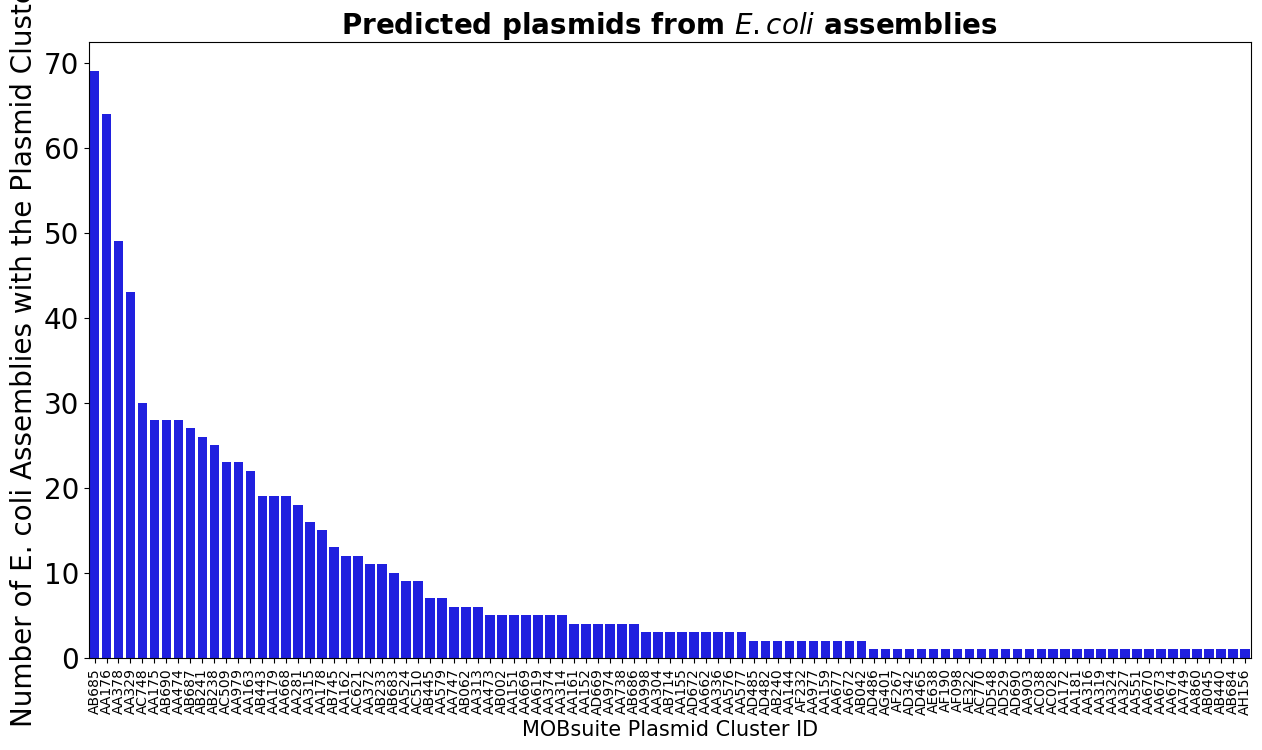

In [9]:

plt.figure(figsize = (15,8))
ax = sns.barplot(data=PA3, x="Plasmid_Cluster", y="Total", color= 'b', order=PA3.sort_values(by='Total', ascending=False).Plasmid_Cluster)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
plt.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("03092023_EcoliPlasmidDetection_plasmidbarplotallassemblies.png", dpi=400, bbox_inches="tight")

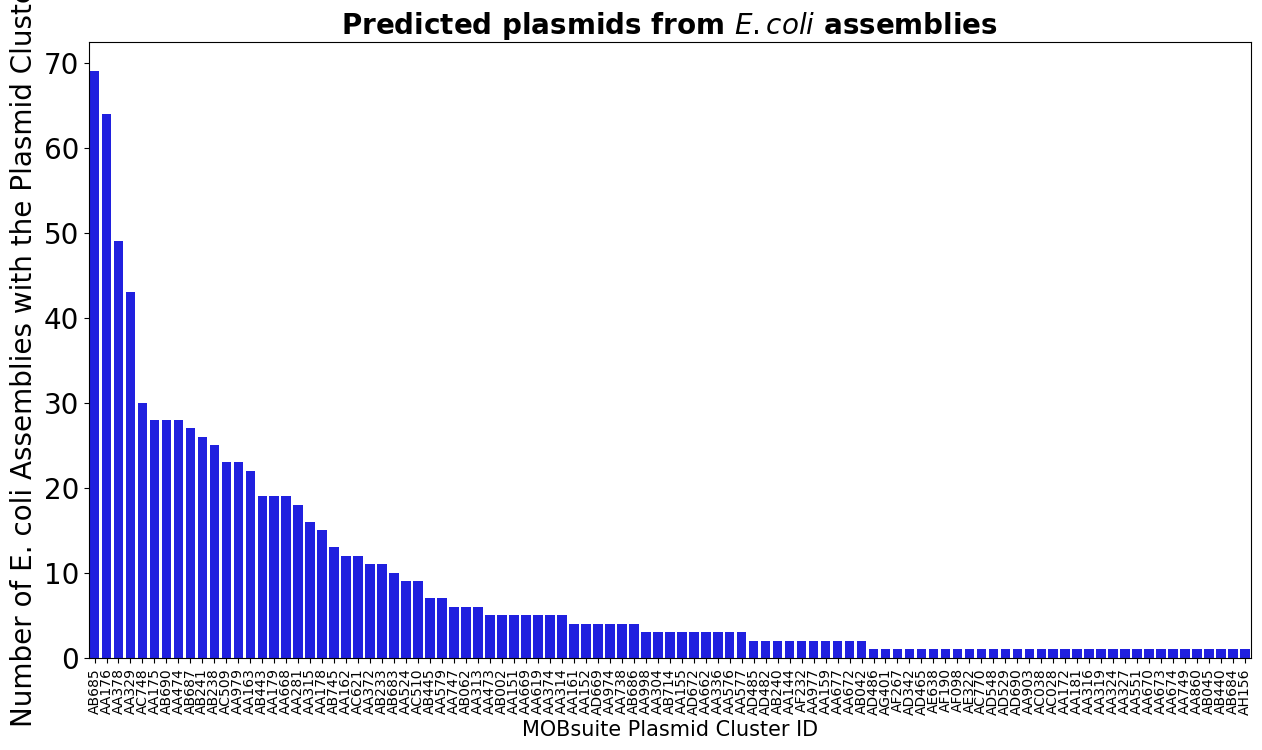

In [10]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=PA3, x="Plasmid_Cluster", y="Total", color= 'b', order=PA3.sort_values(by='Total', ascending=False).Plasmid_Cluster)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
plt.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("03092023_EcoliPlasmidDetection_plasmidbarplotallassemblies.png", dpi=400, bbox_inches="tight")

predicted_host_range_overall_name,"Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria","Actinobacteria,Bacteroidetes,Proteobacteria,Firmicutes","Actinobacteria,Firmicutes,Bacteroidetes,Proteobacteria","Actinobacteria,Firmicutes,Proteobacteria,Bacteroidetes","Actinobacteria,Proteobacteria","Actinobacteria,Proteobacteria,Bacteroidetes,Firmicutes","Actinobacteria,Proteobacteria,Firmicutes,Bacteroidetes","Bacteroidetes,Actinobacteria,Firmicutes,Proteobacteria","Bacteroidetes,Actinobacteria,Proteobacteria,Firmicutes","Bacteroidetes,Firmicutes,Actinobacteria,Proteobacteria",...,Proteobacteria,"Proteobacteria,Actinobacteria","Proteobacteria,Actinobacteria,Firmicutes","Proteobacteria,Actinobacteria,Firmicutes,Bacteroidetes","Proteobacteria,Bacteroidetes,Firmicutes,Actinobacteria","Proteobacteria,Firmicutes,Actinobacteria","Proteobacteria,Firmicutes,Actinobacteria,Bacteroidetes","Proteobacteria,Firmicutes,Bacteroidetes,Actinobacteria",Shigella,Vibrio
sample_id,,,,,,,,,,,,,,,,,,,,,
AA144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AA151,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0
AA152,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
AA155,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
AA159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AF267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#need to fix host range overall names before making the chart
mobsuite_results = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/03282023_EcoliARETE_Plasmids_Isolates_All_mobsuite_results_hostname.csv")

In [31]:
PAhr = mobsuite_results['predicted_host_range_overall_name'].value_counts()

In [37]:
PA4 = pd.DataFrame(data=PAhr)
PA5 = PA4.reset_index()
PA5.columns = ['Host_Range', 'Total']

In [38]:
PA5

,Host_Range,Total
0,Enterobacteriaceae,356
1,Enterobacterales,329
2,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",109
3,Escherichia,66
4,"Actinobacteria,Proteobacteria",9
5,Proteobacteria,3
6,Klebsiella,2
7,-,2
8,"Actinobacteria,Firmicutes,Proteobacteria",2
9,Gammaproteobacteria,1


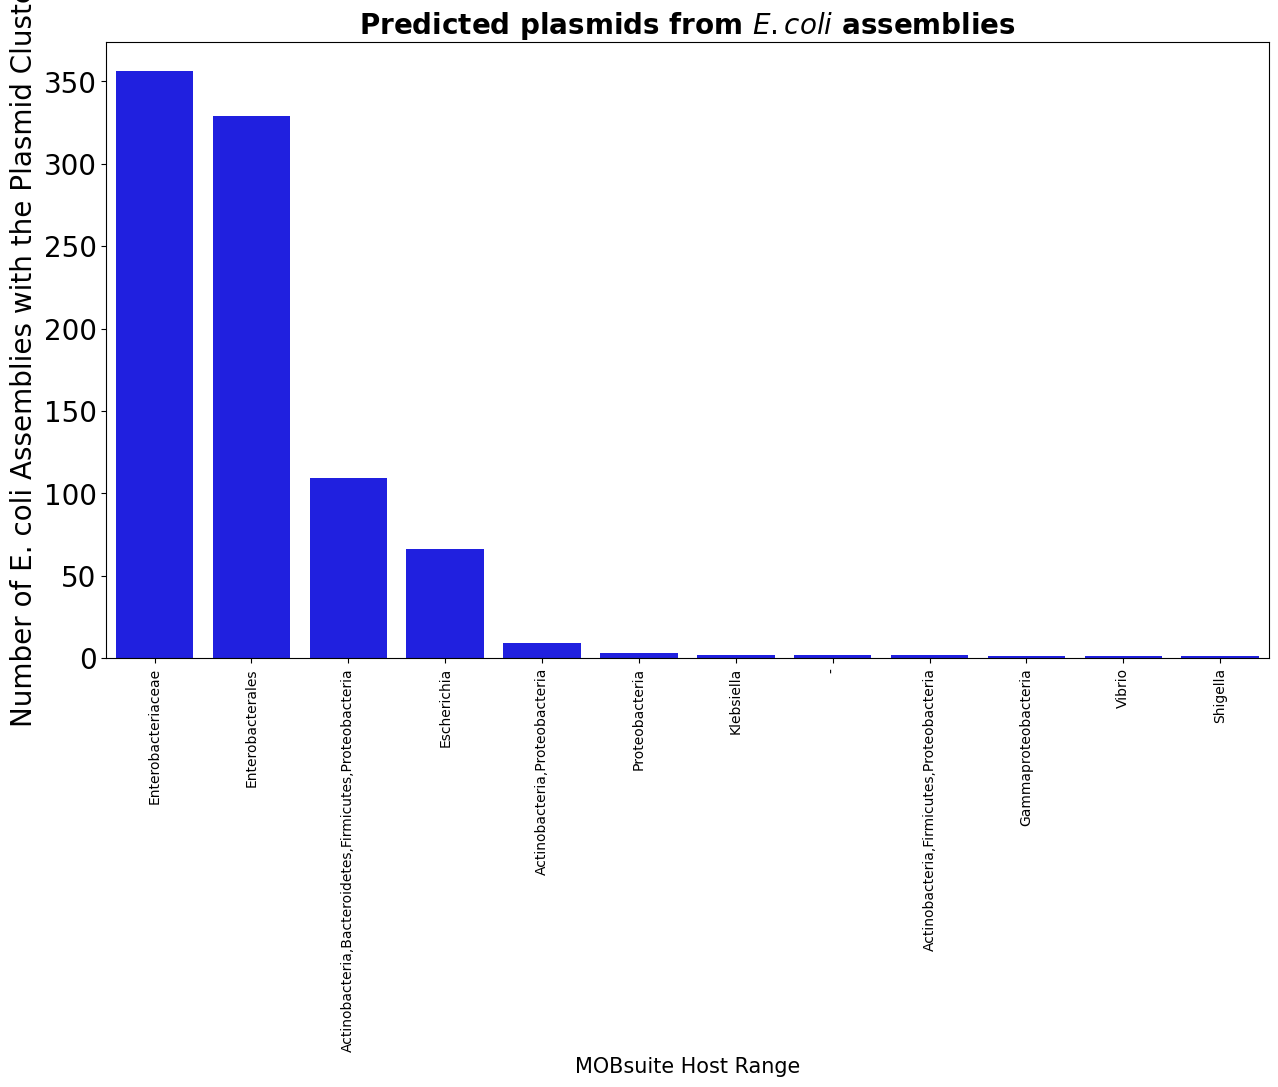

In [39]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=PA5, x="Host_Range", y="Total", color= 'b', order=PA5.sort_values(by='Total', ascending=False).Host_Range)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Host Range",fontsize = 15)
plt.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("03282023_EcoliPlasmidDetection_plasmidhostrangebarplotallassemblies.png", dpi=400, bbox_inches="tight")

In [40]:
PAhrr = mobsuite_results['observed_host_range_ncbi_rank'].value_counts()
PA6 = pd.DataFrame(data=PAhrr)
PA7 = PA6.reset_index()
PA7.columns = ['Host_Range_Rank', 'Total']

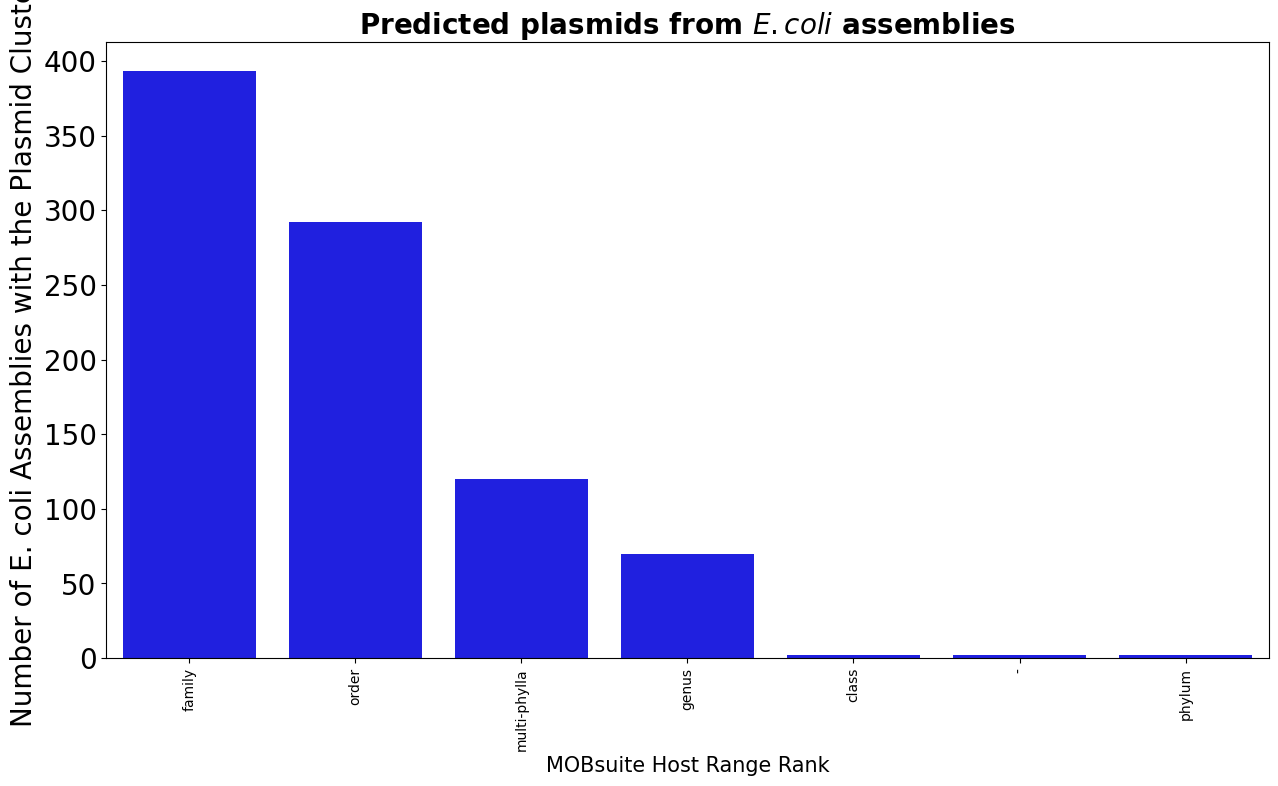

In [42]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=PA7, x="Host_Range_Rank", y="Total", color= 'b', order=PA7.sort_values(by='Total', ascending=False).Host_Range_Rank)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Host Range Rank",fontsize = 15)
plt.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("03282023_EcoliPlasmidDetection_plasmidhostrangerankbarplotallassemblies.png", dpi=400, bbox_inches="tight")